## **Model Training**

In this section, several machine learning models are trained to **predict customer churn** based on the processed dataset.  
Each model’s performance is evaluated using appropriate metrics such as **accuracy**, **precision**, **recall**, and **F1-score** to ensure a balanced comparison.

The goal is to identify the model that provides the **best trade-off between interpretability and predictive power** for potential deployment.

In this notebook, two different models are tested:

- **Naive Bayes** — a probabilistic model that assumes feature independence, providing a fast and interpretable baseline for classification tasks.  
- **XGBoost** — an optimized gradient boosting library designed to be highly efficient, flexible, and portable, often yielding state-of-the-art results on structured data.

#### **Import Libraries and Load Data**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('../data/Telecom_clients.csv')

I will now **remove the columns that are not relevant for model training** to ensure a cleaner and more efficient dataset.


In [5]:
data = data.drop(columns=['customerID'], axis=1)  # Dropping customerID as it is not useful for modeling

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Data Transformation**

In this step, I will **convert the categorical columns into binary values**, and the **numerical columns** will be **divided into three categories**:  

- **Low (0)**  
- **Medium (1)**
- **High (2)**

This transformation helps standardize the data and prepares it for machine learning algorithms that require numerical input.


In [7]:
# Label Encoding for Categorical Variables
le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [8]:
# Binning Numerical Variables into 3 Categories: Low (0), Medium (1)
data['tenure'] = pd.qcut(data['tenure'], q=3, labels=[0, 1, 2])
data['MonthlyCharges'] = pd.qcut(data['MonthlyCharges'], q=3, labels=[0, 1, 2])



In [9]:
 # Dropping TotalCharges due to high correlation with MonthlyCharges and tenure
data = data.drop(columns=['TotalCharges'], axis=1)

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,1,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1
3,1,0,0,0,1,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,1


#### **Data Splitting**

At this stage, I will **split the dataset into training and testing sets**.  
This process ensures that the model is **trained on one portion of the data** and **evaluated on another**, allowing us to measure its ability to generalize to unseen data.

In [11]:
# Features for Prediction
predictions = data.iloc[:,0:18]
# Dividing the classes (churn and non-churn)
classification = data['Churn']

In [12]:
# Now split the training test
X_train, X_test, y_train, y_test = train_test_split(
    predictions, classification, test_size=0.3, random_state=0)

### **Naive Bayes Classifier**

In this section, I will train a **Naive Bayes classifier** to predict customer churn.  
This algorithm is based on **Bayes’ Theorem**, assuming that all features are **independent** of each other.  
Although it’s a simple model, it often performs well on **categorical and binary datasets**, making it a good baseline for comparison with more complex models.

- I dont use the accuracy score because the dataset is unbalanced.

In [13]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
predict_naive = naiveBayes.predict(X_test)

In [14]:
confusion_naive = confusion_matrix(y_test, predict_naive)
confusion_naive

array([[1189,  371],
       [ 162,  391]])

### **XGBoost**

In this section, I will train an **XGBoost (Extreme Gradient Boosting)** model to predict customer churn.  
XGBoost is a **powerful ensemble learning algorithm** that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one.  
It is known for its **high performance**, **speed**, and **ability to handle imbalanced datasets**, making it a great choice for churn prediction tasks.

In [15]:
XGboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
XGboost.fit(X_train, y_train)
y_pred_xgb = XGboost.predict(X_test)

c:\Users\danie\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
confusion_xgb

array([[1332,  228],
       [ 270,  283]])

#### **Comparing the Models**

In this section, I compare the performance of all models — **Naive Bayes** and **XGBoost**.  
The goal is to find which model achieves the best results in predicting customer churn with the highest accuracy and reliability.


In [17]:
# Confusion Matrix for Naive Bayes
confusion_naive

array([[1189,  371],
       [ 162,  391]])

In [18]:
# Confusion Matrix for XGBoost
confusion_xgb

array([[1332,  228],
       [ 270,  283]])

I will choose the **XGBoost model**, as it provides more reliable and consistent predictions compared to the others.

#### **Improved Deployment Model**

In this stage, I will **enhance the XGBoost model** for deployment by performing **hyperparameter tuning** and **retraining it on the full dataset** to achieve optimal performance.  

This model was selected for deployment because it demonstrated the **best balance between accuracy and churn detection**, making it the most reliable option for predicting customer churn in real-world scenarios.


<Figure size 1000x600 with 0 Axes>

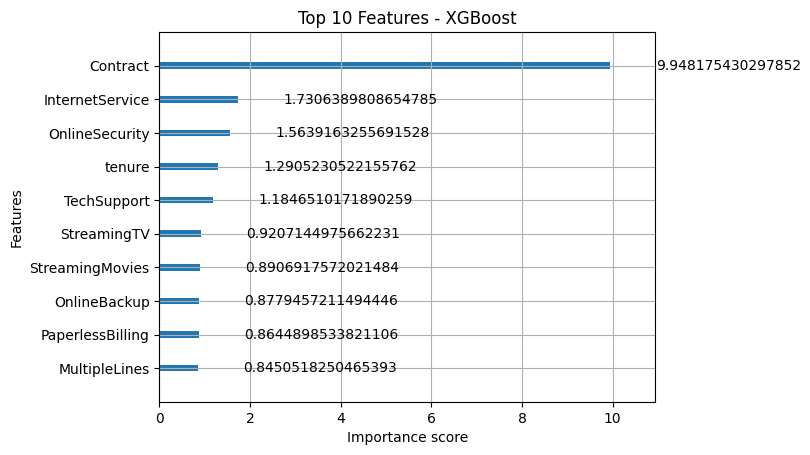

In [19]:
plt.figure(figsize=(10,6))
plot_importance(XGboost, max_num_features=10, importance_type='gain')
plt.title("Top 10 Features - XGBoost")
plt.show()

In [20]:
XGboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True,
                        scale_pos_weight=1.7,
                        n_estimators=150,
                        max_depth=4,
                        learning_rate=0.02,
                        subsample=1,
                        gamma=7,
)
XGboost.fit(X_train, y_train)

c:\Users\danie\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:59:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,'logloss'


This is the **final model** selected for deployment after an extensive process of data preprocessing, feature engineering, and hyperparameter optimization. It demonstrated strong predictive performance and stability across multiple evaluation metrics, making it suitable for real-world use.

Below are the key characteristics and performance metrics of the final model:

In [21]:
y_pred_xgb = XGboost.predict(X_test)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
confusion_xgb

array([[1264,  296],
       [ 178,  375]])

In [22]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.7756743965925225

Saving the final model using **joblib** for deployment:

In [23]:
import joblib

# saving the model
joblib.dump(XGboost, 'xgboost_model.pkl')


['xgboost_model.pkl']

##  **Model Evaluation**

In this section, I will evaluate the performance of the trained models using different metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.  
The goal is to determine which model performs best at predicting customer churn and is most suitable for deployment.

### **Evaluation Metrics**

1. **Accuracy**: The proportion of correctly predicted instances (both churn and non-churn) out of the total instances.
2. **Precision**: The proportion of true positive predictions (correctly predicted churn instances) out of all positive predictions (both true positives and false positives).
3. **Recall**: The proportion of true positive predictions out of all actual positive instances (true positives and false negatives).
4. **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns.


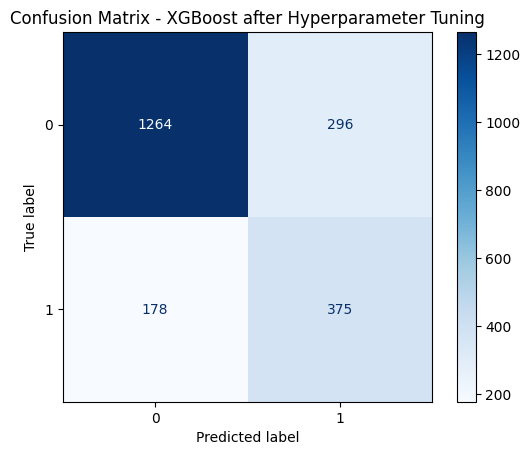

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_xgb,
                              display_labels=XGboost.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost after Hyperparameter Tuning")
plt.show()

#### **Confusion Matrix**

- True positive (0 - 0): The model correctly predicts no-churn.
- True negative (1 - 1): The model correctly predicts churn.
- False positive (0 - 1): The model incorrectly predicts no-churn.
- False negative (1 - 0): The model incorrectly predicts churn.

- ##### **Results for XGBoost**
I find this results based the confusion matrix and classification report for the XGBoost model after hyperparameter tuning:

 - Accuracy: ~0.77 (the accuracy is not the best metric for unbalanced datasets)

 - Precision: ~0.58 (the proportion of positive identifications that were actually correct)

 - Recall: ~0.68 (the proportion of actual positives that were identified correctly)

 - F1 Score: ~0.61

 This shows that the model has a good balance in predicting churn and non-churn, and avoids giving false warnings.